# Customer Cluster Analysis

## Import libraries

In [1]:
#import modules
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.cluster import KMeans

# Loading Data

In [2]:
#read data
customer_df = pd.read_csv("Mall_Customers.csv")

In [3]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Cleaning

We will clean the data before doing any analysis to make sure it does not contain any missing values or outliers.

We will also work on the data and organise it to make it easier to analyse.

In [4]:
#check data for any null values
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The data has no null values hence we can proceed with the analysis.

We will check for outliers in the numerical columns.

In [5]:
#plot boxplots for the numerical columns to check for outliers
numeric_columns = customer_df.select_dtypes(include=['number']).columns

def outliers_boxplots(df, columns=numeric_columns, title="Outliers", color= "magenta"):
    fig = make_subplots(rows=1, cols=len(columns))
    for i, column in enumerate(columns):
        trace = go.Box(y=df[column],name=f'{column}',marker=dict(color=color))
        fig.add_trace(trace, row=1, col=i+1)
    fig.update_layout(title_text=title, title_x=0.5)
    fig.show()

outliers_boxplots(customer_df, numeric_columns)

The data has no outliers hence we can proceed with the analysis.

In [6]:
#view basic statistics
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The remaining data seems to be clean and ready for analysis

## Basic Data Exploration

Let's create a pairplot of all the variables in our dataframe to get a visual look at any correlations between variables.

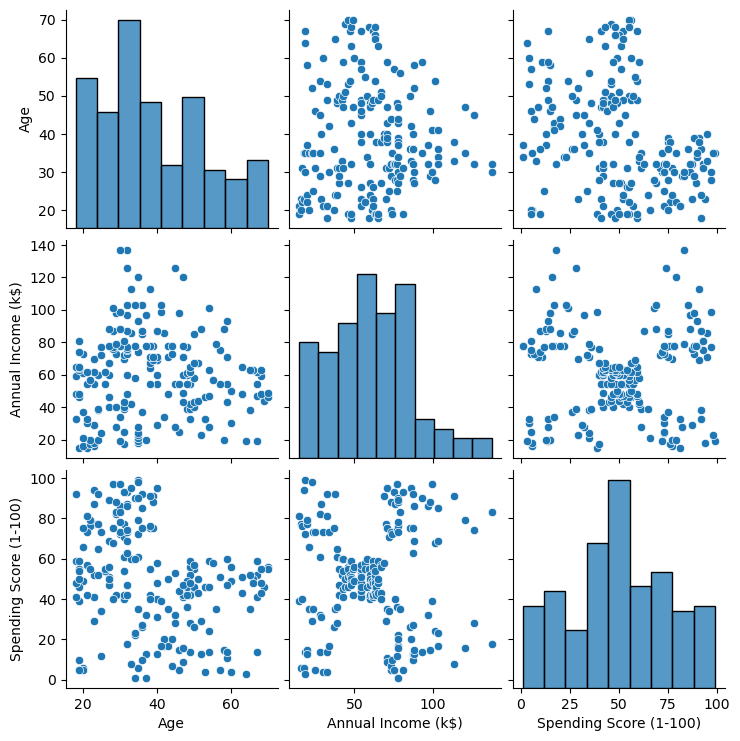

In [7]:
#visualize some of the data with a pairplot
sns.pairplot(data=customer_df, vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"])

We can some corelation between the variables. We will explore this further using clustering.

# K-Means Clustering

We will use K-Means clustering to segment the customers into groups based on their spending habits.

## 1. Age vs Spending Score

Lets explore which age group of customers have made the most purchases.

<Axes: title={'center': 'Age vs Spending Score'}, xlabel='Age', ylabel='Spending Score (1-100)'>

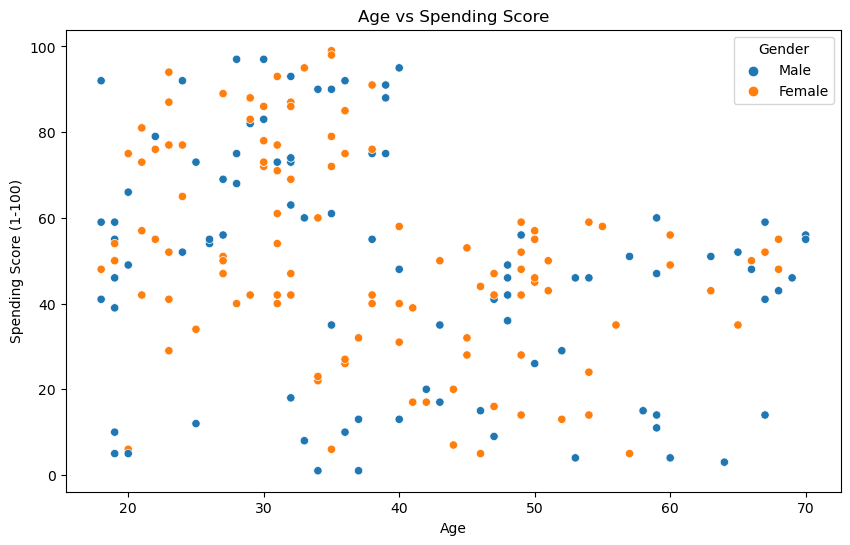

In [8]:
# plot age vs spending score
plt.figure(figsize=(10,6))
plt.title("Age vs Spending Score")
sns.scatterplot(data=customer_df, x="Age", y="Spending Score (1-100)", hue="Gender")

We can observe that customers in the age group of 20-40 have made the most purchases.

In [9]:
#will use age and spending score for clustering
X = customer_df[['Age', 'Spending Score (1-100)']]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


We will use the elbow method to find the optimal number of clusters.

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak o

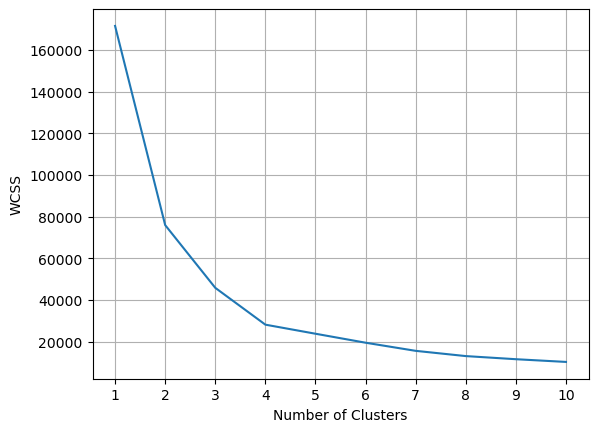

In [10]:
#use elbow method to find optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 0, max_iter= 300, n_init= 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plot elbow method
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()

From the above graph the optimal number of clusters is 4. 

In [11]:
#use 4 clusters
kmeans = KMeans(n_clusters= 4, init= "k-means++", random_state= 0, max_iter= 300, n_init= 10)

We fit the model and predict the clusters.

In [12]:
#fit model
y_means = kmeans.fit_predict(X)

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Lets assign the clusters to new dataframe.

In [13]:
#create new dataframe with clusters

cluster_one = pd.DataFrame(X[y_means == 0]).reset_index(drop= True)
cluseter_two = pd.DataFrame(X[y_means == 1]).reset_index(drop= True)
cluster_three = pd.DataFrame(X[y_means == 2]).reset_index(drop= True)
cluster_four = pd.DataFrame(X[y_means == 3]).reset_index(drop= True)

We will plot the clusters and see how the clusters are distributed.

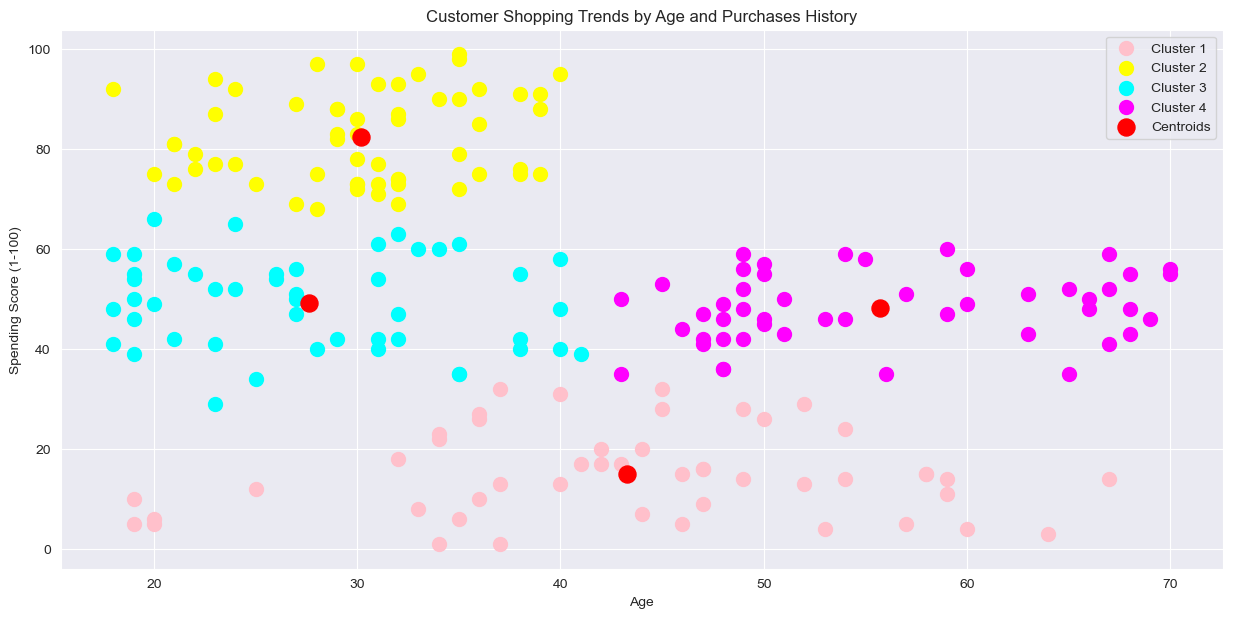

In [14]:
#set plot style
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))

#plot clusters
plt.scatter(cluster_one["Age"], cluster_one["Spending Score (1-100)"], s=100, c="pink", label="Cluster 1")
plt.scatter(cluseter_two["Age"], cluseter_two["Spending Score (1-100)"], s=100, c="yellow", label="Cluster 2")
plt.scatter(cluster_three["Age"], cluster_three["Spending Score (1-100)"], s=100, c="cyan", label="Cluster 3")
plt.scatter(cluster_four["Age"], cluster_four["Spending Score (1-100)"], s=100, c="magenta", label="Cluster 4")

#plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c="red", label="Centroids")

plt.title("Customer Shopping Trends by Age and Purchases History")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()

## 2. Annual Income vs Spending Score
- We will cluster the customers based on their annual income and spending score.

<Axes: title={'center': 'Annual Income vs Spending Score'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

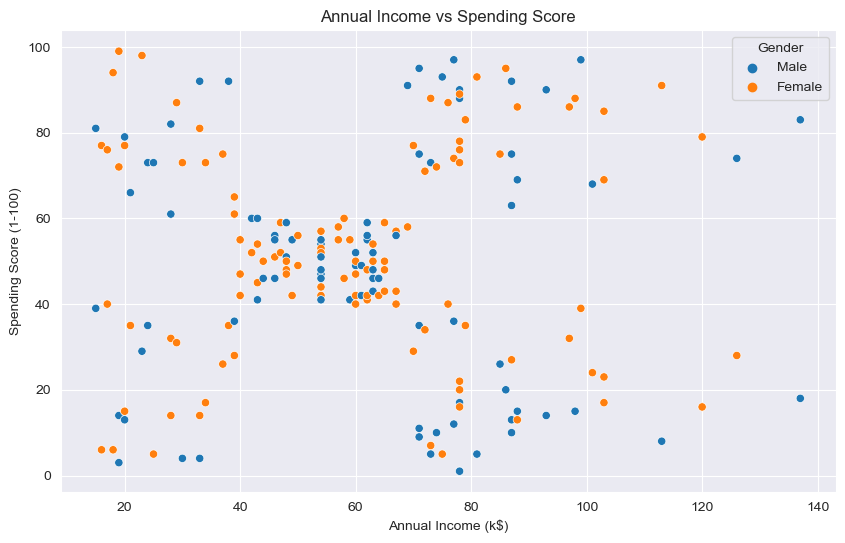

In [15]:
#plot annual income vs spending score
plt.figure(figsize=(10,6))
plt.title("Annual Income vs Spending Score")
sns.scatterplot(customer_df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")

We can observe some corelation with customers with both higher and lower annual income having higher spending score while customers with average annual income have average spending score.

We will cluster the data using the elbow method and find the optimal number of clusters.

In [16]:
#will use annual income and spending score for clustering
X = customer_df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak o

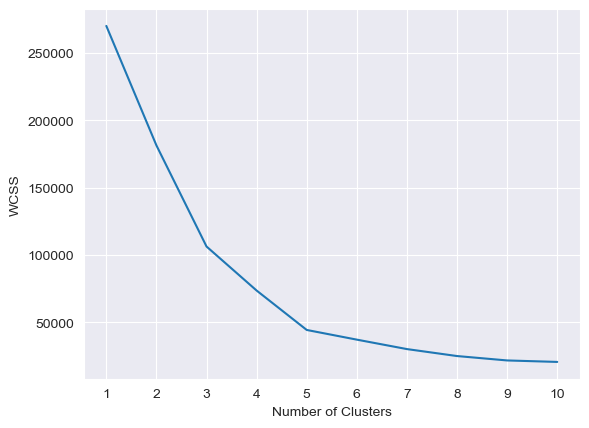

In [17]:
#elbow method to find optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 0, max_iter= 300, n_init= 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plot elbow method
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)

The graph shows that the optimal number of clusters is 5. 

In [18]:
#use 5 clusters
kmeans = KMeans(n_clusters= 5, init= "k-means++", random_state= 0, max_iter= 300, n_init= 10)

In [19]:
#fit model
y_means = kmeans.fit_predict(X)

c:\ProgramData\Anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Lets assign the clusters to new dataframe.

In [20]:
#create new dataframe with clusters

cluster_one = pd.DataFrame(X[y_means == 0]).reset_index(drop= True)
cluseter_two = pd.DataFrame(X[y_means == 1]).reset_index(drop= True)
cluster_three = pd.DataFrame(X[y_means == 2]).reset_index(drop= True)
cluster_four = pd.DataFrame(X[y_means == 3]).reset_index(drop= True)
cluster_five = pd.DataFrame(X[y_means == 4]).reset_index(drop= True)

We will plot the clusters and see how the clusters are distributed.

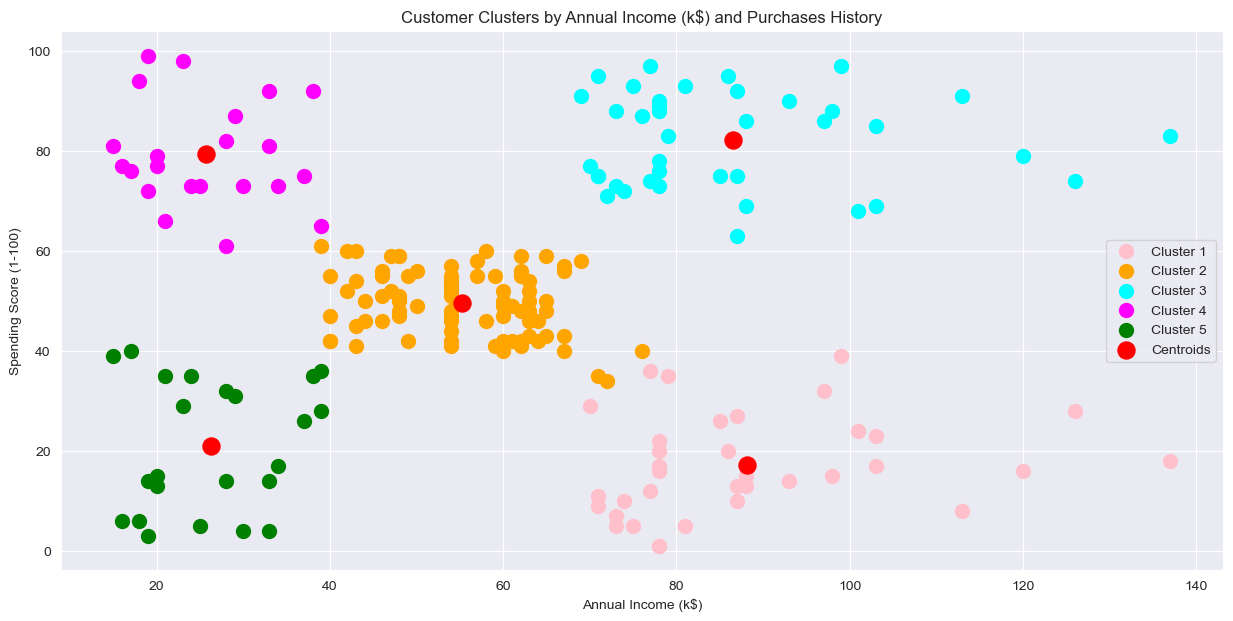

In [21]:
#set plot style
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))

#plot clusters
plt.scatter(cluster_one["Annual Income (k$)"], cluster_one["Spending Score (1-100)"], s=100, c="pink", label="Cluster 1")
plt.scatter(cluseter_two["Annual Income (k$)"], cluseter_two["Spending Score (1-100)"], s=100, c="orange", label="Cluster 2")
plt.scatter(cluster_three["Annual Income (k$)"], cluster_three["Spending Score (1-100)"], s=100, c="cyan", label="Cluster 3")
plt.scatter(cluster_four["Annual Income (k$)"], cluster_four["Spending Score (1-100)"], s=100, c="magenta", label="Cluster 4")
plt.scatter(cluster_five["Annual Income (k$)"], cluster_five["Spending Score (1-100)"], s=100, c="green", label="Cluster 5")

#plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c="red", label="Centroids")

plt.title("Customer Clusters by Annual Income (k$) and Purchases History")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

# Conclusion

From the above plots, we can see that there are 5 distinct customer segments based on annual income and spending score. The clusters are as follows: 
- High Income, High Spending Score
- High Income, Low Spending Score
- Average Income, Average Spending Score
- Low Income, High Spending Score
- Low Income, Low Spending Score

We can also see that there are 4 distinct customer segments based on age and spending score. The clusters are as follows:
- Young, High Spending Score
- Young, Average Spending Score
- Old, Average Spending Score
- Low Spending Score across all ages